In [9]:
# ============================================
# IDENTIFY EDIBILITY OF MUSHROOMS - ML MODELLING NOTEBOOK
# ============================================

CSV_PATH = "C:/Users/filip/Documents/Code/bedste-gruppe-ml/data/raw_data/mushroom_raw_data.csv"

import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

print("Libraries loaded.")


Libraries loaded.


In [10]:
# 1) LOAD DATA
df = pd.read_csv(CSV_PATH)

print(df.shape)
df.head()


(8416, 23)


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [11]:
# 2) DEFINE FEATURES & TARGET
TARGET_COL = "poisonous"  # Target variable
drop_cols = [
    "veil-type", #single value
    "stalk-root" #missing in 29% of data
]  # Any columns to drop

df_model = df.drop(columns=drop_cols)
df_model.head(), df_model.shape

(  poisonous cap-shape cap-surface cap-color  bruises    odor gill-attachment  \
 0    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
 1    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
 2    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
 3    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
 4    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
 
   gill-spacing gill-size gill-color stalk-shape stalk-surface-above-ring  \
 0      CROWDED    NARROW      WHITE    TAPERING                   SMOOTH   
 1      CROWDED    NARROW      WHITE    TAPERING                   SMOOTH   
 2      CROWDED    NARROW       PINK    TAPERING                   SMOOTH   
 3      CROWDED    NARROW       PINK    TAPERING                   SMOOTH   
 4      CROWDED    NARROW      BROWN    TAPERING                   SMOOTH   
 
   stalk-surface-below-ring stalk-color-above-ri

In [12]:
# 3) SPLIT DATA
X = df_model.drop(columns=[TARGET_COL])
y = df_model[TARGET_COL]

print(X.shape, y.shape)
X.head()



(8416, 20) (8416,)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [13]:
# 4) SPLIT DATA INTO TRAIN AND TEST SETS
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(poisonous
 EDIBLE       0.533274
 POISONOUS    0.466726
 Name: proportion, dtype: float64,
 poisonous
 EDIBLE       0.533254
 POISONOUS    0.466746
 Name: proportion, dtype: float64)

In [14]:
# 5) BUILD PREPROCESSING AND PIPELINE

categorical_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_features
        )
    ]
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", model)
    ]
)

clf



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [15]:
# 6) TRAIN MODEL

clf.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

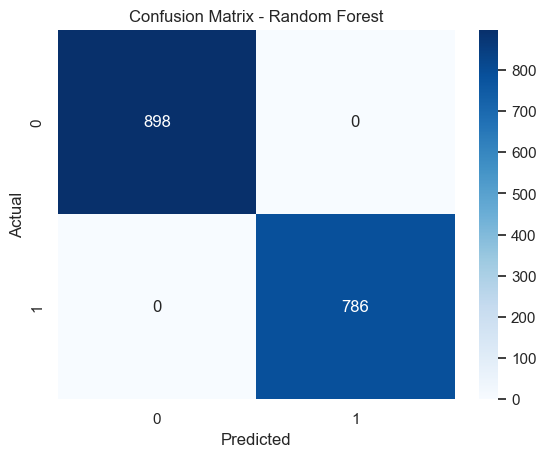

In [16]:
# 7) EVALUATE MODEL

y_pred = clf.predict(x_test)

##Print a confusion matrix Random Forest
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
